In [1]:
#  all imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math

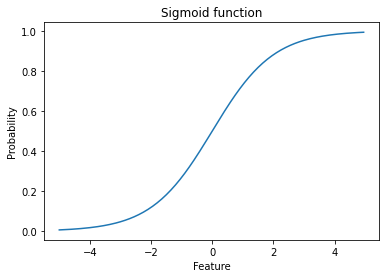

In [2]:
#  Plotting Sigmoid
def calc_y_sig(data):
    y_vals = []
    for elem in data:
        y_vals.append(1 / ( 1 + math.exp(-elem)))
    return y_vals


x_vals = np.arange(-5, 5, 0.05)
y_vals = calc_y_sig(x_vals)

plt.plot(x_vals, y_vals)
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.title('Sigmoid function')
plt.show()

# Explorational Data Analysis 

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
print(train_data.shape)
train_data.head()

(4250, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [4]:
print(test_data.shape)
test_data.head()

(750, 20)


,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [5]:
# drop 'id' as it is useless here
test_data.drop(columns=['id'], inplace=True)
test_data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [6]:
#  Now we can concatenate train_data and test_data
sets = [train_data, test_data]
data = pd.concat(sets)
print(data.shape)
data.head()

(5000, 20)


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [7]:
# get all possible values for each column1
for column in data.columns:
    print(column,':', set(data[column].unique()), '\n\n')

state : {'TX', 'NH', 'MI', 'NC', 'GA', 'MN', 'MT', 'AZ', 'MS', 'RI', 'WV', 'FL', 'CO', 'WI', 'WA', 'IA', 'ID', 'DC', 'OH', 'SC', 'MD', 'MA', 'VA', 'AK', 'VT', 'IL', 'CA', 'NJ', 'KY', 'WY', 'NY', 'NV', 'PA', 'AR', 'CT', 'NE', 'OK', 'LA', 'SD', 'DE', 'IN', 'HI', 'AL', 'ND', 'ME', 'KS', 'NM', 'MO', 'UT', 'TN', 'OR'} 


account_length : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 15

In [8]:
# divide all features by type
all_features = data.columns
boolean_features = ['international_plan', 'voice_mail_plan']
categorical_features = ['state', 'area_code']
numerical_features = [item for item in all_features if item not in boolean_features]
numerical_features = [item for item in all_features if item not in categorical_features]
numerical_features

['account_length',
 'international_plan',
 'voice_mail_plan',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn']

In [9]:
# make dummy from bolean features

for feature in boolean_features:
    data[feature].replace({'yes': 1, 'no': 0}, inplace=True)

# in churn we have also nans
print('quantity of nan:', 5000 - data['churn'].value_counts()['no'] - data['churn'].value_counts()['yes'])

# drop nans
data = data.loc[(data['churn'] == 'no') | (data['churn'] == 'yes')]
data

quantity of nan: 750


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,0,0,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,0,0,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,0,0,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


0 counts :  3652 
 1 counts :  598


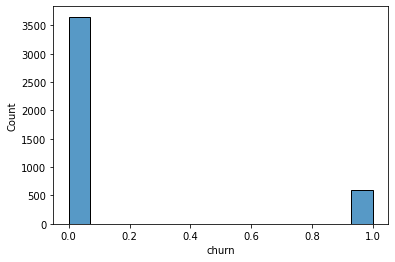

In [10]:
# plot distribution of target variable
data['churn'].replace({'no': 0, 'yes': 1}, inplace=True)
sns.histplot(data['churn'])
print('0 counts : ', data['churn'].value_counts()[0], '\n', '1 counts : ', data['churn'].value_counts()[1])

In [11]:
# replacing in area_code to numerical
data['area_code'].replace({'area_code_415': 415, 'area_code_408': 408, 'area_code_510': 510}, inplace=True)

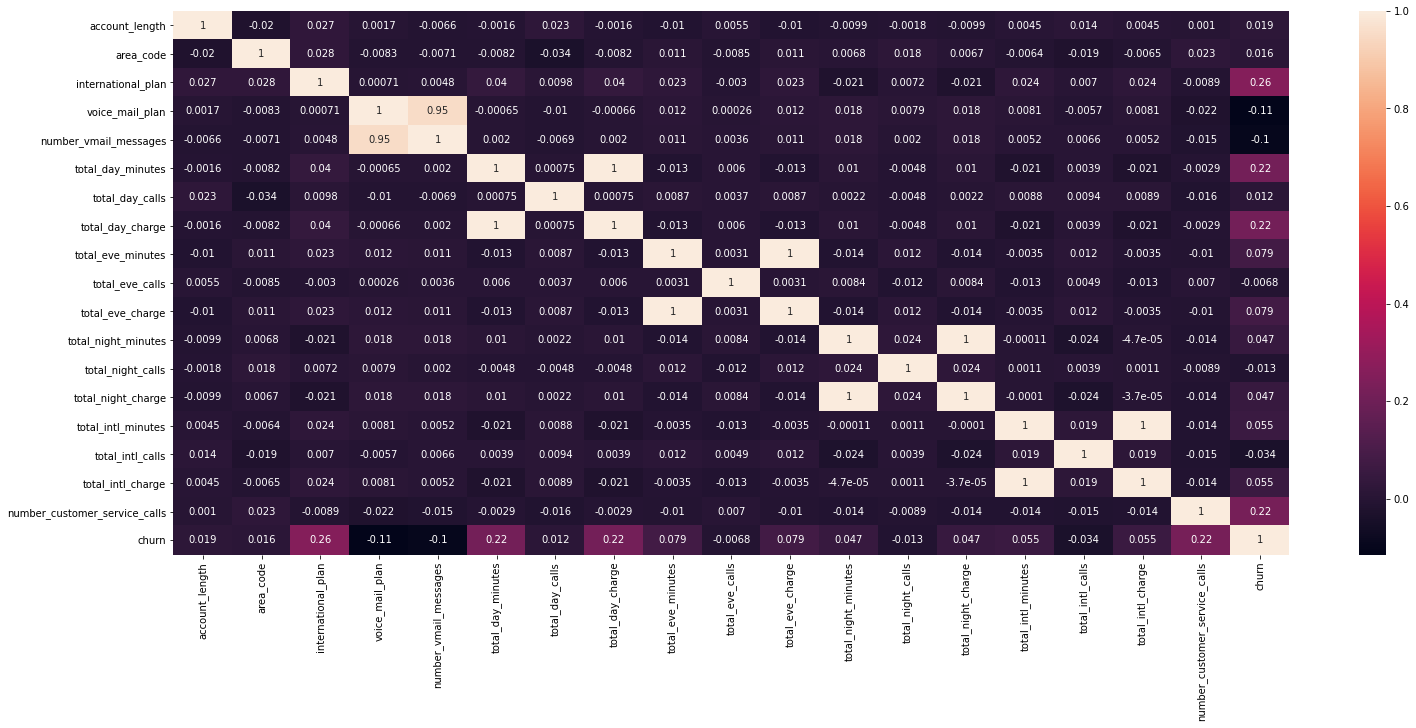

In [12]:
# building correlation matrix and plotting heatmap of it
corrMatrix = data.corr()
plt.figure(figsize = (25, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

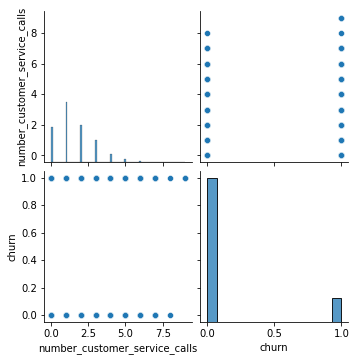

In [13]:
sns.pairplot(data[['number_customer_service_calls', 'churn']])

In [14]:
# drop useless columns 
data.drop(columns=['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge'], inplace=True)

In [15]:
data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,number_customer_service_calls,churn
0,OH,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0
1,NJ,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0
2,OH,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0
3,OK,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0
4,MA,121,510,0,1,24,218.2,88,348.5,108,212.6,118,7.5,7,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,415,0,0,0,188.3,70,243.8,88,213.7,79,10.3,6,0,0
4246,WV,73,408,0,0,0,177.9,89,131.2,82,186.2,89,11.5,6,3,0
4247,NC,75,408,0,0,0,170.7,101,193.1,126,129.1,104,6.9,7,1,0
4248,HI,50,408,0,1,40,235.7,127,223.0,126,297.5,116,9.9,5,2,0


In [ ]:
# save processed data in order to proceed to model building part
data.to_csv('processed_data.csv')